<a href="https://colab.research.google.com/github/AbelPhilippe/Gravitation/blob/main/0001_Spacetime_Physics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CURVATURE**
# Gravitation seems to have disappeared. Everywhere the geometry of spacetime is locally Lorentzian. And in Lorentz geometry, particles move in a straight line with constant velocity.
# Observe the distance from a spacecraft to a nearby spacecraft, or, to avoid any possible concern about attraction between the two spacecraft, observe two nearby test particles in orbit around the Earth. To avoid distraction by the nonlocal element (the Earth) in the situation, conduct the study inside a spacecraft, also in orbit around the Earth. But this region has already been counted as a local inertial frame of reference, so what gravitational physics can be seen there? None.
# Relative to the spacecraft, and therefore relative to each other, the two test particles move in a straight line at uniform speed, for the measurement accuracy that is contemplated—the Flatness Test. Now the key point begins to emerge: measurement accuracy. Increase it until you begin to discern the gradual acceleration of the test particles away from each other if they are along a common radius through the center of the Earth; or toward each other if their separation is perpendicular to that line. In Newtonian parlance, the source of these accelerations is the tidal action of the Earth. For the observer in the spacecraft, however, no Earth is visible. And following Einstein, he knows that it is important to analyze the motion locally. He represents the separation of the new test particle from the fiducial test particle by the vector (k = 1, 2, 3; components measured in a local Lorentz frame).
# Gravitation manifests itself in the relative acceleration of neighboring test particles.

$$\frac{d^{2}\xi^{x}}{dt^{2}}=-\frac{Gm_{\mathrm{conv}}}{c^{2}r^{3}}\xi^{x};$$

$$\frac{d^2\xi^y}{dt^2}=-\frac{Gm_{\mathrm{conv}}}{c^{2}r^{3}}\xi^{y};$$

$$\frac{d^{2}\xi^{z}}{dt^{2}}=\frac{2Gm_{\mathrm{conv}}}{c^{2}r^{3}}\xi^{z};$$

In [15]:
import math
import cmath
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [14]:
def system_of_equations(t, y, G, m_conv, c_squared):

    xi_x, xi_y, xi_z, dxi_x_dt, dxi_y_dt, dxi_z_dt = y

    r_cubed = (xi_x**2 + xi_y**2 + xi_z**2)**1.5

    """
    System of differential equations:
    d²ξ^x/dt² = - G*m_conv/(c²*r³) * ξ^x
    d²ξ^y/dt² = - G*m_conv/(c²*r³) * ξ^y
    d²ξ^z/dt² = 2*G*m_conv/(c²*r³) * ξ^z

    The state vector y contains
    [ξ^x, ξ^y, ξ^z, dξ^x/dt, dξ^y/dt, dξ^z/dt]
    """

    # Avoid division by zero
    if r_cubed < 1e-10:
        r_cubed = 1e-10

    coefficient = G * m_conv / (c_squared * r_cubed)

    # Second-order derivatives
    d2xi_x_dt2 = -coeff * xi_x
    d2xi_y_dt2 = -coeff * xi_y
    d2xi_z_dt2 = 2 * coeff * xi_z

    return [dxi_x_dt, dxi_y_dt, dxi_z_dt, d2xi_x_dt2, d2xi_y_dt2, d2xi_z_dt2]

In [7]:
G = 6.67430e-11           # Gravitational constant (m³/kg/s²)
m_conv = 1.989e30         # Mass (example: solar mass in kg)
c_squared = (3.0e8)**2    # Speed of light squared (m²/s²)

In [9]:
initial_conditions = [1.0, 0.0, 0.0, 0.0, 0.1, 0.0]   # Example values
#----------------------------------------------------------------#
# # Initial conditions [ξ^x, ξ^y, ξ^z, dξ^x/dt, dξ^y/dt, dξ^z/dt]

In [10]:
# Time span for integration
t_span = (0, 100)                                     # Time in arbitrary units
t_eval = np.linspace(t_span[0], t_span[1], 1000)      # Points to evaluate

In [11]:
solution = solve_ivp(
    fun=lambda t, y: system_of_equations(t, y, G, m_conv, c_squared),
    t_span=t_span,
    y0=initial_conditions,
    method='RK45',
    t_eval=t_eval
)

t = solution.t
xi_x = solution.y[0]
xi_y = solution.y[1]
xi_z = solution.y[2]

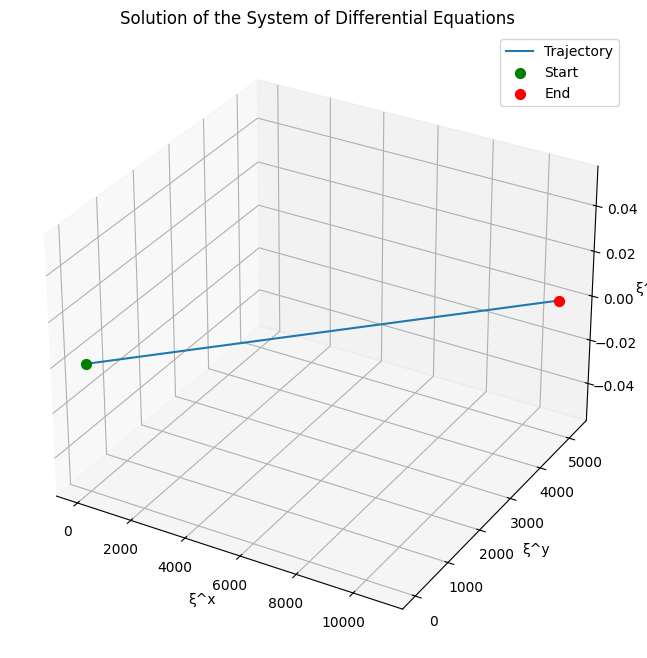

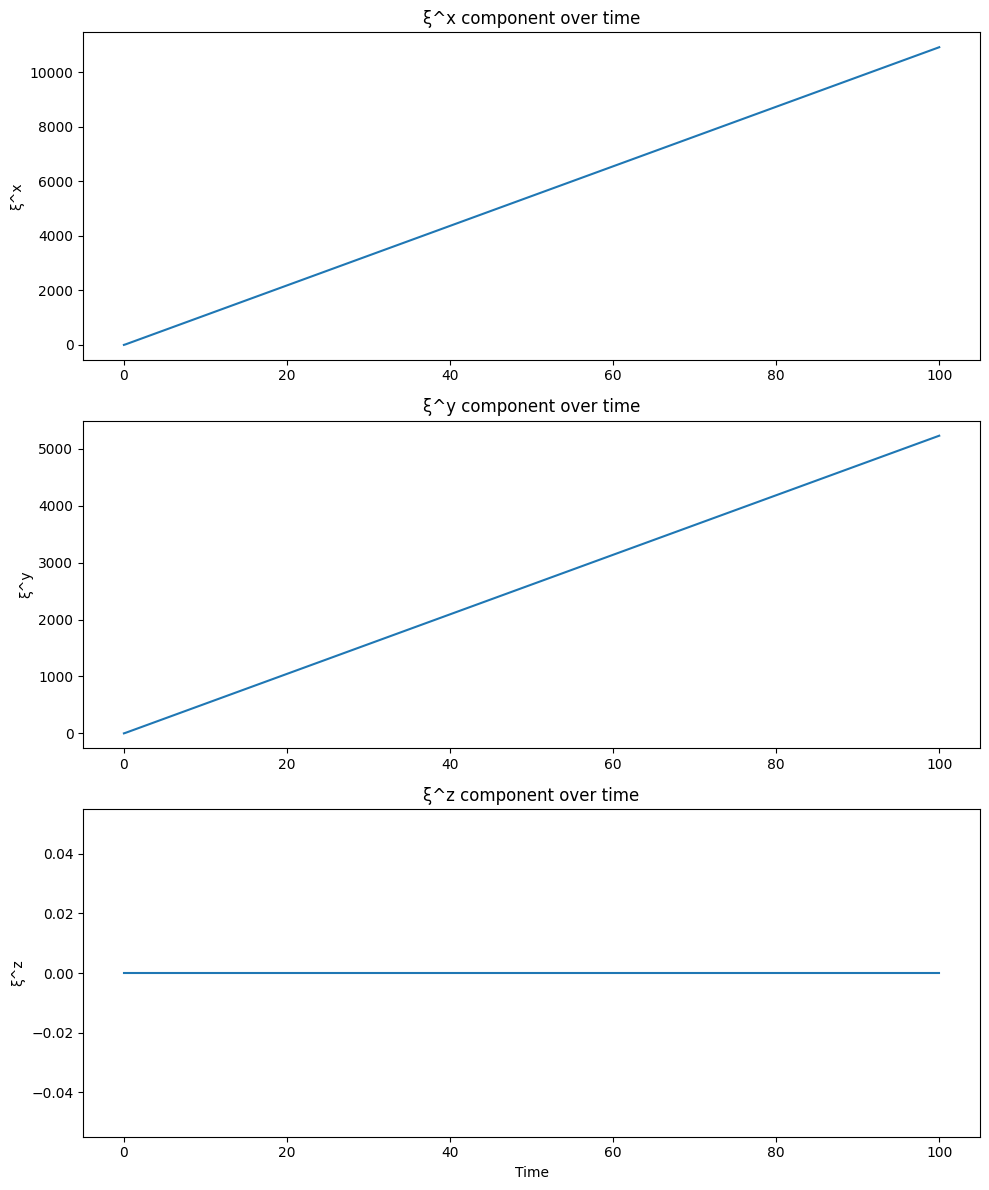

Maximum values:
ξ^x max: 10909.381322670766
ξ^y max: 5228.884233181893
ξ^z max: 0.0


In [13]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d') # Plot the trajectory in 3D
ax.plot(xi_x, xi_y, xi_z, label='Trajectory')
ax.scatter(xi_x[0], xi_y[0], xi_z[0], color='green', s=50, label='Start')
ax.scatter(xi_x[-1], xi_y[-1], xi_z[-1], color='red', s=50, label='End')
ax.set_xlabel('ξ^x')
ax.set_ylabel('ξ^y')
ax.set_zlabel('ξ^z')
ax.set_title('Solution of the System of Differential Equations')
ax.legend()

# Plot the components over time
fig, axs = plt.subplots(3, 1, figsize=(10, 12))
axs[0].plot(t, xi_x)
axs[0].set_ylabel('ξ^x')
axs[0].set_title('ξ^x component over time')

axs[1].plot(t, xi_y)
axs[1].set_ylabel('ξ^y')
axs[1].set_title('ξ^y component over time')

axs[2].plot(t, xi_z)
axs[2].set_ylabel('ξ^z')
axs[2].set_title('ξ^z component over time')
axs[2].set_xlabel('Time')

plt.tight_layout()
plt.show()

print("Maximum values:")
print(f"ξ^x max: {np.max(np.abs(xi_x))}")
print(f"ξ^y max: {np.max(np.abs(xi_y))}")
print(f"ξ^z max: {np.max(np.abs(xi_z))}")